<a href="https://colab.research.google.com/github/camilotorron/TestNotebooks/blob/main/CustomerSegmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KMeans unsupervised algorithm
###Customer segmentation based on their spending on different product categories

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv('https://raw.githubusercontent.com/ironhack-datalabs/datamad0419/master/module-3/lab-unsupervised-learning/Wholesale%20customers%20data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [65]:
data.shape

(440, 8)

In [66]:
list(data.columns)

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [67]:
for col in data:
  print('Column {} is {}'.format(col , data[col].isnull().values.any()))

Column Channel is False
Column Region is False
Column Fresh is False
Column Milk is False
Column Grocery is False
Column Frozen is False
Column Detergents_Paper is False
Column Delicassen is False


In [68]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [69]:
data = data.drop(['Channel', 'Region'], axis=1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
pd.DataFrame(scaled_data[:10])

,0,1,2,3,4,5
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
5,0.083907,0.111706,0.055218,0.010535,0.043896,0.030204
6,0.108098,0.042809,0.075148,0.007478,0.076842,0.011306
7,0.067554,0.066732,0.101566,0.027020,0.081276,0.053463
8,0.053144,0.048922,0.066708,0.006574,0.041961,0.015582
9,0.053527,0.150293,0.203477,0.018638,0.181805,0.043700


Text(0, 0.5, 'Sum of Squared Error')

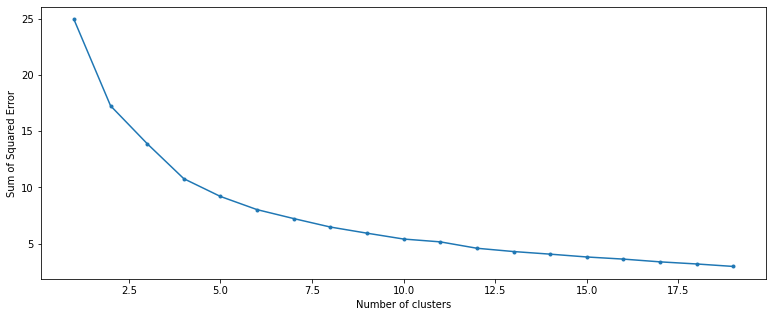

In [71]:
from sklearn.cluster import KMeans


clusters = range(1, 20)
sse=[]
for c in clusters:
    model = KMeans(n_clusters=c)
    model.fit(scaled_data)
    sse.append(model.inertia_)


fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(clusters, sse, marker='.')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Sum of Squared Error')

Let's fit with choosen number of clusters: 5

In [72]:
opt_model = KMeans(n_clusters = 5)
opt_model.fit(scaled_data)

KMeans(n_clusters=5)

In [75]:
y_pred = opt_model.predict(scaled_data)
data['cluster'] = y_pred
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,3
438,10290,1981,2232,1038,168,2125,1


In [76]:
data['cluster'].value_counts()

1    279
3     91
0     56
2     10
4      4
Name: cluster, dtype: int64